In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons

In [0]:
import pandas as pd

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test (1).csv')

In [6]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
## 'price'가 target 이구나...

In [10]:
X_all = train.drop(['price'], axis=1)
y=train['price']

print(type(X_all), type(y), X_all.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> (15035, 20) (15035,)


In [11]:
X_all.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [14]:
y.head()

0    221900.0
1    180000.0
2    510000.0
3    257500.0
4    291850.0
Name: price, dtype: float64

In [15]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 20 columns):
id               15035 non-null int64
date             15035 non-null object
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 2.3+ MB


In [0]:
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
X= X_all[sel]
y = train['price']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
#5개의 트리를 먼저 그려볼 것이다.
forest = RandomForestRegressor(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [23]:
print(forest.estimators_)

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1872583848, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=794921487, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_f

In [24]:
print(forest.score)

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=2, verbose=0,
                      warm_start=False)>


In [25]:
forest.feature_importances_

array([0.03934276, 0.07187087, 0.6741707 , 0.21461568])

In [26]:
forest.n_features_

4

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def plot_feature_importance_price(model, dataset):
  n_features = dataset.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), dataset.columns)
  plt.xlabel("Feature Importance")
  plt.ylabel('Feature')
  plt.ylim(-1, n_features)

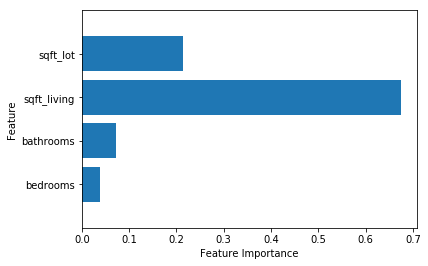

In [30]:
plot_feature_importance_price(forest, X)

In [33]:
#100개의 트리를 먼저 그려볼 것이다.
forest100 = RandomForestRegressor(n_estimators=100, random_state=2)
forest100.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

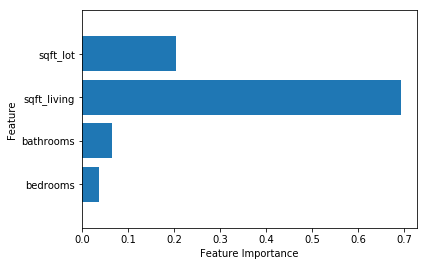

In [35]:
plot_feature_importance_price(forest100, X)

In [0]:
pred = forest100.predict(X_test)

In [41]:
pred

array([353226.        , 356009.2       , 437252.43      , ...,
       249564.16666667, 449330.        , 426125.25      ])

In [0]:
data = pd.DataFrame({'y_test': y_test, 'prediction': pred, 'Difference': y_test-pred})

In [44]:
data.head()

,y_test,prediction,Difference
2021,256000.0,353226.00,-97226.00
12670,235000.0,356009.20,-121009.20
4359,626700.0,437252.43,189447.57
10556,245500.0,228563.50,16936.50
3468,593450.0,427928.00,165522.00


In [45]:
# 훈련데이터셋 및 테스트 데이터셋 점수 확인
print('훈련데이터셋 점수: {:.2f}'.format(forest100.score(X_train, y_train)))
print('테스트데이터셋 점수: {:.2f}'.format(forest100.score(X_test, y_test)))

훈련데이터셋 점수: 0.94
테스트데이터셋 점수: 0.48


In [59]:
cnt = 1

for model in forest100.estimators_:
  model.fit(X_train, y_train)
  
  if cnt % 5 == 0:
    print('훈련 셋 정확도: {:.2f}'.format(model.score(X_train, y_train)))
    print("테스트 셋 정확도: {:.2f}".format(model.score(X_test, y_test))
  cnt += +1

SyntaxError: ignored

In [60]:
cnt = 1

for model in forest100.estimators_:
  model.fit(X_train, y_train)
  
  if cnt %5 == 0:
    print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))
  cnt += +1

훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.081
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.066
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.088
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.090
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.066
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.079
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.073
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.072
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.082
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.064
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.077
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.092
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.079
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.077
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.077
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.080
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.076
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.090
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.072
훈련 세트 정확도 : 0.999
테스트 세트 정확도 : 0.071


In [0]:
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

x_test = test[sel]

In [0]:
sub_test = x_test.values

In [52]:
sub_test

array([[3.0000e+00, 2.2500e+00, 2.5700e+03, 7.2420e+03],
       [4.0000e+00, 3.0000e+00, 1.9600e+03, 5.0000e+03],
       [4.0000e+00, 4.5000e+00, 5.4200e+03, 1.0193e+05],
       ...,
       [3.0000e+00, 2.5000e+00, 1.3100e+03, 1.2940e+03],
       [2.0000e+00, 7.5000e-01, 1.0200e+03, 1.3500e+03],
       [3.0000e+00, 2.5000e+00, 1.6000e+03, 2.3880e+03]])

In [0]:
prediction = forest100.predict(sub_test)

In [0]:
sub=pd.read_csv('sample_submission.csv')

In [0]:
sub['price'] = prediction

In [0]:
### 유방암 데이터 셋으로 위의 과정 다시 학습해보기!!

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [74]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [0]:
X = cancer.data
y = cancer.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=cancer.target, random_state=0)

In [0]:
# (랜덤 포레스트 트리의 개수 = 5개, random_state=0, 최대 변수 선택 = 4)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)

In [83]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [84]:
# 훈련데이터셋 및 테스트 데이터셋 점수 확인
print('훈련데이터셋 점수: {:.2f}'.format(forest.score(X_train, y_train)))
print('테스트데이터셋 점수: {:.2f}'.format(forest.score(X_test, y_test)))

훈련데이터셋 점수: 1.00
테스트데이터셋 점수: 0.96


In [85]:
# 5개 모델 정확도 평가
for model in forest.estimators_:
  model.fit(X_train, y_train)
  print('훈련 셋 정확도 : {:.2f}'.format(model.score(X_train, y_train)))
  print('테스트 셋 정확도 : {:.2f}'.format(model.score(X_test, y_test)))

훈련 셋 정확도 : 1.00
테스트 셋 정확도 : 0.90
훈련 셋 정확도 : 1.00
테스트 셋 정확도 : 0.90
훈련 셋 정확도 : 1.00
테스트 셋 정확도 : 0.92
훈련 셋 정확도 : 1.00
테스트 셋 정확도 : 0.96
훈련 셋 정확도 : 1.00
테스트 셋 정확도 : 0.92


In [87]:
print(forest.feature_importances_)
print(forest.max_features)
print(forest.n_features)
print(forest.oob_score)
print(forest)

[3.76860510e-02 2.11692945e-02 2.55374816e-02 4.23802484e-03
 5.14596232e-04 2.24486391e-03 1.37368562e-01 1.55787486e-01
 1.67243775e-03 4.73857364e-03 1.27760838e-02 1.50519398e-03
 3.25761789e-03 1.20912181e-01 0.00000000e+00 3.22541567e-05
 3.80360129e-03 7.63504192e-05 5.29319514e-03 3.11860452e-03
 2.37550828e-02 2.26465985e-02 1.84324365e-01 7.37441353e-03
 1.00346265e-03 2.27451535e-03 1.09645245e-02 1.94263444e-01
 3.26514955e-03 8.39599023e-03]
auto


AttributeError: ignored

In [88]:
forest1 = RandomForestClassifier(n_estimators=100, random_state=0)
forest1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [89]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel('Feature Importance')
  plt.ylabel('Importance')
  plt.ylim(-1, n_features)

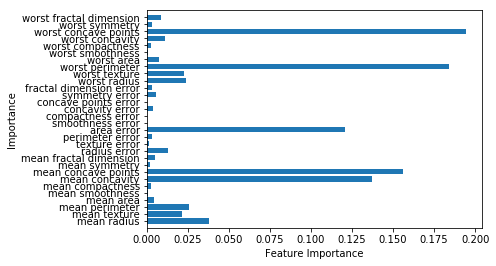

In [94]:
plot_feature_importances_cancer(forest)

In [91]:
cancer.data.shape

(569, 30)

In [95]:
print(forest1.feature_importances_)
print(forest1.max_features)
print(forest1.n_features)
print(forest1.oob_score)
print(forest)

[0.02969122 0.01720923 0.06929807 0.04112995 0.00500449 0.00636883
 0.08056202 0.09200666 0.00435231 0.0042842  0.02136349 0.00420529
 0.01354811 0.02303752 0.00288949 0.00593161 0.00468708 0.0027883
 0.003081   0.00229185 0.12542246 0.01704882 0.19536571 0.0743788
 0.00948886 0.0086519  0.02172119 0.10149821 0.00399358 0.00869974]
auto


AttributeError: ignored

In [0]:
# Ravel함수 이해하기

Original Array : 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

ravel():  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


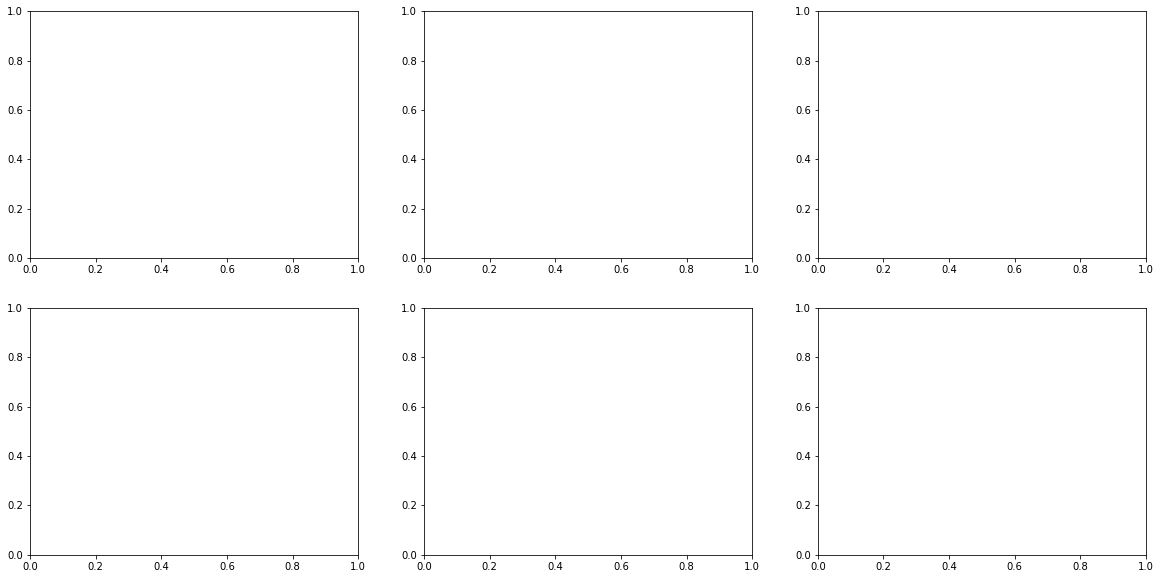

In [97]:
fig1, axes1 = plt.subplots(2, 3, figsize=(20,10)) # 2행3열로 그리기

import numpy as np
array = np.arange(15).reshape(3,5)
print("Original Array : \n", array)
print('\nravel(): ', array.ravel())

In [0]:
# enumerate이해

In [99]:
for i, name in enumerate(['body', 'foo', 'bar']):
  print(i, name)

0 body
1 foo
2 bar


In [0]:
# zip이해

In [102]:
for i1, i2 in zip([11, 12, 13], [4, 5, 6]):
  print(i1, i2)

11 4
12 5
13 6


In [0]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [107]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [111]:
pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=6c41dcc8b806bca0b727cc7e069a35c0a590da4d7d894ac6a3c48ae6fde3a7a4
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [113]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


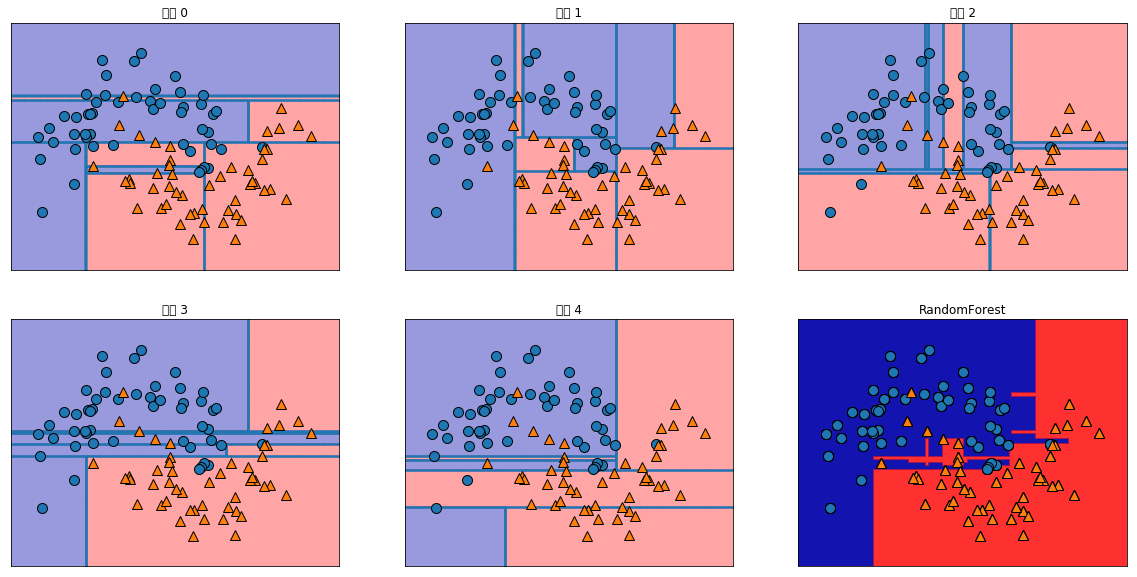

In [115]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))

#각각의 트리에 각가의 트리 객체 대입
#1단계: zip에 의해 그래프 객체 1-6(ax), 모델객체1-6(tree)
#2단계; enumeate에 의한 인덱스 부여

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("트리 {}".format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
  mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=0.4)
  axes[-1,-1].set_title('RandomForest')
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y)